# Waste packaging statistics - Exploratory analysis

SOURCE OF DATA: Eurostat

DATASET: Packaging waste by waste management operations and waste flow [env_waspac]

DATA SOURCE URL: http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=env_waspac&lang=en

LAST UPDATE: 29.08.18 18:31:26

EXTRACTION DATE: 06.09.18 14:52:34

WASTE TYPE: Packaging (all), Paper and cardboard, Plastic, Wooden, Metallic, Aluminium, Steel, Glass, Other

TIME SERIES: 1997 to 2016, yearly data

GEO: EU aggregates, single EU countries
    
UNITS: Kilograms per capita, Tonne, Percentage  
    
WASTE OPERATION: Waste generated, Recovery, Recovery - incineration with energy recovery (packaging), Recovery - energy recovery (R1), Recovery - other, Recycling, Recycling - material, Recycling - other

FLOW: Domestic, Imports, Exports

Available flags:
"b","break in time series"
"c","confidential"
"d","definition differs, see metadata"
"e","estimated"
"f","forecast"
"i","see metadata (phased out)"
"n","not significant"
"p","provisional"
"r","revised"
"s","Eurostat estimate (phased out)"
"u","low reliability"
"z","not applicable"

Questions about the data:
- Does "Domestic" only include domestically produced waste or also imported waste?
- How does "Recovery - incineraction with energy recovery" differ from "Recovery - energy recovery (R1)"?

In [124]:
# Data analysis questions - overview

## Which country generates the most packaging waste in total (tonne)?
## Which country generates the most packaging waste per capita?
## What is breakdown of packaging waste by type for each country?
## What share of packaging waste is recovered, what share is recycled?
## How does this differ by waste type?
## How has the volume (total and per capita) of packaging waste produced evolved for each country?
## How has the volume (total and per capita and percentage) of types of packaging waste evolved for each country?
## Does the share of packaging waste that is recycled increase over time?
## Does the share of plastic packaging waste that is recycled increase over time?
## What share and what volume of packaging waste is exported by country?
## What share and what volume of packaging waste is imported by country?

In [125]:
# Hypothesis - overview

## The amount of packaging waste produced increases over time in all EU countries
## The amount of packaging waste recycled is steady over time
## The amount of packaging waste produced per capita varies among EU countries
## The types of packaging waste do not vary very much over time

# Load modules

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("max.rows", 1000)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Data cleaning

In [127]:
df = pd.read_csv('data/Eurostat-env_waspac_data-2018-09-06.csv')
df.head()

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes
0,1997,European Union (current composition),Packaging,Imports,Waste generated,Kilograms per capita,:,NaN
1,1997,European Union (current composition),Packaging,Imports,Waste generated,Tonne,:,NaN
2,1997,European Union (current composition),Packaging,Imports,Waste generated,Percentage,:,NaN
3,1997,European Union (current composition),Packaging,Imports,Recovery,Kilograms per capita,:,NaN
4,1997,European Union (current composition),Packaging,Imports,Recovery,Tonne,:,NaN


In [128]:
df['Flag and Footnotes'].value_counts()

s     1025
e      697
b       50
be       5
Name: Flag and Footnotes, dtype: int64

In [129]:
df[df['Flag and Footnotes'] == "b"]

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes
293598,2011,Germany (until 1990 former territory of the FRG),Packaging,Domestic,Recovery - incineration with energy recovery (...,Kilograms per capita,1.09,b
293599,2011,Germany (until 1990 former territory of the FRG),Packaging,Domestic,Recovery - incineration with energy recovery (...,Tonne,"87,428",b
293601,2011,Germany (until 1990 former territory of the FRG),Packaging,Domestic,Recovery - energy recovery (R1),Kilograms per capita,51.63,b
293602,2011,Germany (until 1990 former territory of the FRG),Packaging,Domestic,Recovery - energy recovery (R1),Tonne,"4,144,419",b
293670,2011,Germany (until 1990 former territory of the FRG),Paper and cardboard packaging,Domestic,Recovery - incineration with energy recovery (...,Kilograms per capita,0.35,b
293671,2011,Germany (until 1990 former territory of the FRG),Paper and cardboard packaging,Domestic,Recovery - incineration with energy recovery (...,Tonne,"27,781",b
293673,2011,Germany (until 1990 former territory of the FRG),Paper and cardboard packaging,Domestic,Recovery - energy recovery (R1),Kilograms per capita,10.45,b
293674,2011,Germany (until 1990 former territory of the FRG),Paper and cardboard packaging,Domestic,Recovery - energy recovery (R1),Tonne,"839,227",b
293742,2011,Germany (until 1990 former territory of the FRG),Plastic packaging,Domestic,Recovery - incineration with energy recovery (...,Kilograms per capita,0.31,b
293743,2011,Germany (until 1990 former territory of the FRG),Plastic packaging,Domestic,Recovery - incineration with energy recovery (...,Tonne,"24,574",b


In [130]:
df[df['Flag and Footnotes'] == "be"]

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes
294528,2011,Estonia,Metallic packaging,Domestic,Waste generated,Kilograms per capita,22.36,be
294529,2011,Estonia,Metallic packaging,Domestic,Waste generated,Tonne,"29,687",be
294546,2011,Estonia,Metallic packaging,Domestic,Recycling - material,Kilograms per capita,14.06,be
294547,2011,Estonia,Metallic packaging,Domestic,Recycling - material,Tonne,"18,664",be
294548,2011,Estonia,Metallic packaging,Domestic,Recycling - material,Percentage,62.9,be


Note: All breaks in time series seem to happen in 2011; watch out for later bumps at this time point

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414720 entries, 0 to 414719
Data columns (total 8 columns):
TIME                  414720 non-null int64
GEO                   414720 non-null object
WASTE                 414720 non-null object
STK_FLOW              414720 non-null object
WST_OPER              414720 non-null object
UNIT                  414720 non-null object
Value                 414720 non-null object
Flag and Footnotes    1777 non-null object
dtypes: int64(1), object(7)
memory usage: 25.3+ MB


In [132]:
# convert value column to number

In [133]:
def float_conversion(value_str):
    try:
        value=float(value_str.replace(",",""))
        return value
    except:
        pass

In [134]:
df['amount_waste']=df['Value'].apply(float_conversion)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414720 entries, 0 to 414719
Data columns (total 9 columns):
TIME                  414720 non-null int64
GEO                   414720 non-null object
WASTE                 414720 non-null object
STK_FLOW              414720 non-null object
WST_OPER              414720 non-null object
UNIT                  414720 non-null object
Value                 414720 non-null object
Flag and Footnotes    1777 non-null object
amount_waste          77854 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 28.5+ MB


# Data analysis

## Which country generates the most packaging waste in total (tonne)?

In [136]:
df_2016 = df[df['TIME']==2016]
df_2016

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
393984,2016,European Union (current composition),Packaging,Imports,Waste generated,Kilograms per capita,:,NaN,NaN
393985,2016,European Union (current composition),Packaging,Imports,Waste generated,Tonne,:,NaN,NaN
393986,2016,European Union (current composition),Packaging,Imports,Waste generated,Percentage,:,NaN,NaN
393987,2016,European Union (current composition),Packaging,Imports,Recovery,Kilograms per capita,:,NaN,NaN
393988,2016,European Union (current composition),Packaging,Imports,Recovery,Tonne,:,NaN,NaN
393989,2016,European Union (current composition),Packaging,Imports,Recovery,Percentage,:,NaN,NaN
393990,2016,European Union (current composition),Packaging,Imports,Recovery - incineration with energy recovery (...,Kilograms per capita,:,NaN,NaN
393991,2016,European Union (current composition),Packaging,Imports,Recovery - incineration with energy recovery (...,Tonne,:,NaN,NaN
393992,2016,European Union (current composition),Packaging,Imports,Recovery - incineration with energy recovery (...,Percentage,:,NaN,NaN
393993,2016,European Union (current composition),Packaging,Imports,Recovery - energy recovery (R1),Kilograms per capita,:,NaN,NaN


In [137]:
df_2016[(df_2016['WASTE']=='Packaging')&(df_2016['STK_FLOW']=='Domestic')&(df_2016['WST_OPER']=='Waste generated')&(df['UNIT']=='Tonne')].sort_values(by='amount_waste', ascending = False)

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
394033,2016,European Union (current composition),Packaging,Domestic,Waste generated,Tonne,"86,327,540",s,86327540.0
397273,2016,Germany (until 1990 former territory of the FRG),Packaging,Domestic,Waste generated,Tonne,"18,161,800",NaN,18161800.0
400513,2016,France,Packaging,Domestic,Waste generated,Tonne,"12,682,757",NaN,12682757.0
412177,2016,United Kingdom,Packaging,Domestic,Waste generated,Tonne,"11,476,321",NaN,11476321.0
399865,2016,Spain,Packaging,Domestic,Waste generated,Tonne,"7,230,653",NaN,7230653.0
407641,2016,Poland,Packaging,Domestic,Waste generated,Tonne,"5,641,573",NaN,5641573.0
406345,2016,Netherlands,Packaging,Domestic,Waste generated,Tonne,"3,140,000",NaN,3140000.0
394681,2016,Belgium,Packaging,Domestic,Waste generated,Tonne,"1,780,492",NaN,1780492.0
408289,2016,Portugal,Packaging,Domestic,Waste generated,Tonne,"1,653,955",NaN,1653955.0
406993,2016,Austria,Packaging,Domestic,Waste generated,Tonne,"1,340,711",NaN,1340711.0


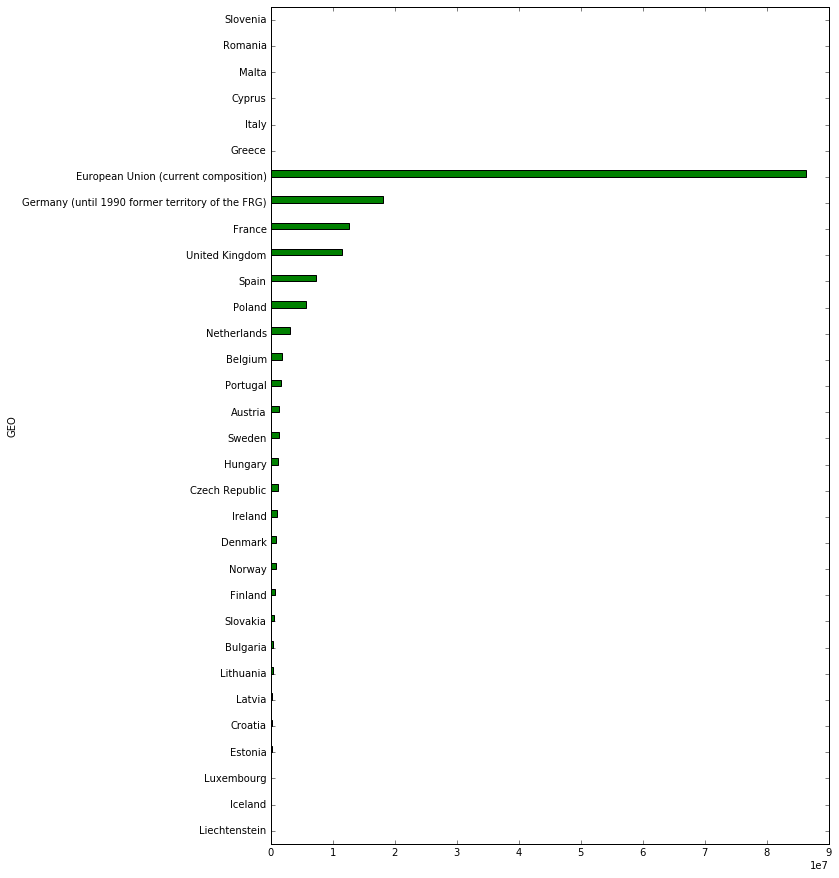

In [138]:
df_2016[(df_2016['WASTE']=='Packaging')&(df_2016['STK_FLOW']=='Domestic')&(df_2016['WST_OPER']=='Waste generated')&(df['UNIT']=='Tonne')].sort_values(by='amount_waste', ascending = True).plot(kind='barh', figsize = (10,15), x="GEO", legend = False)

## Which country generates the most packaging waste per capita?

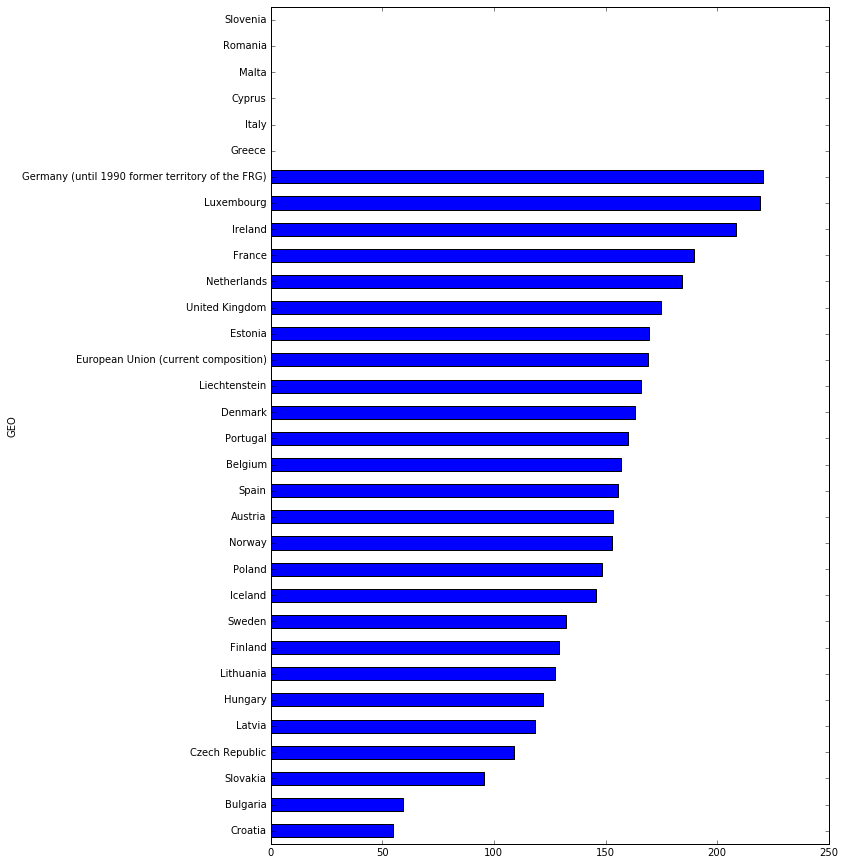

In [139]:
df_2016[(df_2016['WASTE']=='Packaging')&(df_2016['STK_FLOW']=='Domestic')&(df_2016['WST_OPER']=='Waste generated')&(df_2016['UNIT']=='Kilograms per capita')].sort_values(by='amount_waste', ascending = True).plot(kind='barh', figsize = (10,15), x="GEO", y='amount_waste', legend = False)

In [140]:
df_2016[(df_2016['WASTE']=='Packaging')&(df_2016['STK_FLOW']=='Domestic')&(df_2016['WST_OPER']=='Waste generated')&(df['UNIT']=='Kilograms per capita')].sort_values(by='amount_waste', ascending = True)

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
401160,2016,Croatia,Packaging,Domestic,Waste generated,Kilograms per capita,54.99,NaN,54.99
395328,2016,Bulgaria,Packaging,Domestic,Waste generated,Kilograms per capita,59.08,NaN,59.08
410232,2016,Slovakia,Packaging,Domestic,Waste generated,Kilograms per capita,95.35,NaN,95.35
395976,2016,Czech Republic,Packaging,Domestic,Waste generated,Kilograms per capita,108.82,NaN,108.82
403104,2016,Latvia,Packaging,Domestic,Waste generated,Kilograms per capita,118.2,NaN,118.20
405048,2016,Hungary,Packaging,Domestic,Waste generated,Kilograms per capita,121.78,NaN,121.78
403752,2016,Lithuania,Packaging,Domestic,Waste generated,Kilograms per capita,127.39,NaN,127.39
410880,2016,Finland,Packaging,Domestic,Waste generated,Kilograms per capita,129.19,NaN,129.19
411528,2016,Sweden,Packaging,Domestic,Waste generated,Kilograms per capita,132.41,NaN,132.41
412824,2016,Iceland,Packaging,Domestic,Waste generated,Kilograms per capita,145.89,NaN,145.89


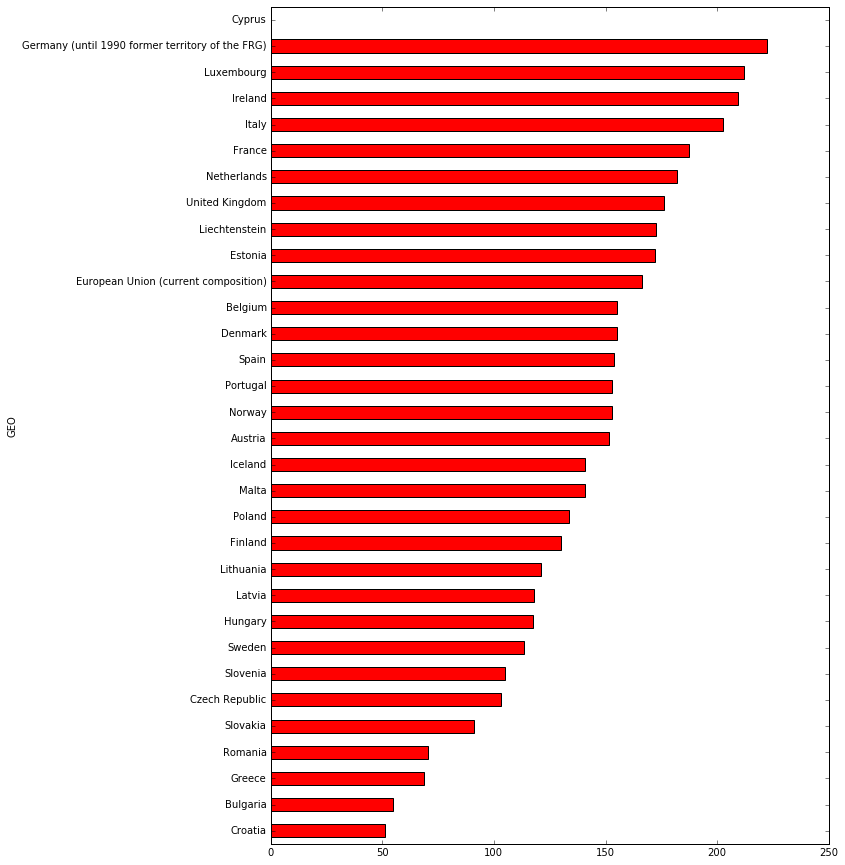

In [141]:
df_2015 = df[df['TIME']==2015]
df_2015[(df_2015['WASTE']=='Packaging')&(df_2015['STK_FLOW']=='Domestic')&(df_2015['WST_OPER']=='Waste generated')&(df_2015['UNIT']=='Kilograms per capita')].sort_values(by='amount_waste', ascending = True).plot(kind='barh', figsize = (10,15), x="GEO", y='amount_waste',color='red', legend = False)


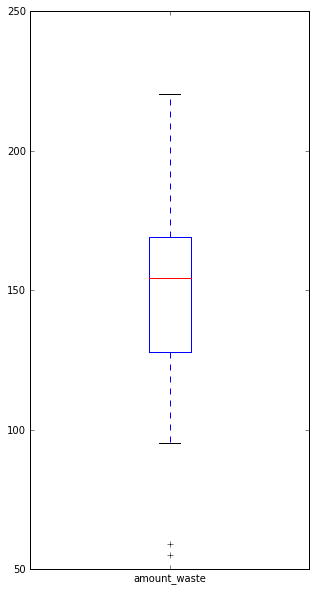

In [142]:
df_2016[(df_2016['WASTE']=='Packaging')&(df_2016['STK_FLOW']=='Domestic')&(df_2016['WST_OPER']=='Waste generated')&(df['UNIT']=='Kilograms per capita')].plot(kind='box', y='amount_waste', figsize=(5,10))

## Which country generates the most plastic packaging waste per capita?

In [143]:
df_2016_domestic_generated_pc =df_2016[(df_2016['STK_FLOW']=='Domestic')&(df_2016['WST_OPER']=='Waste generated')&(df['UNIT']=='Kilograms per capita')]

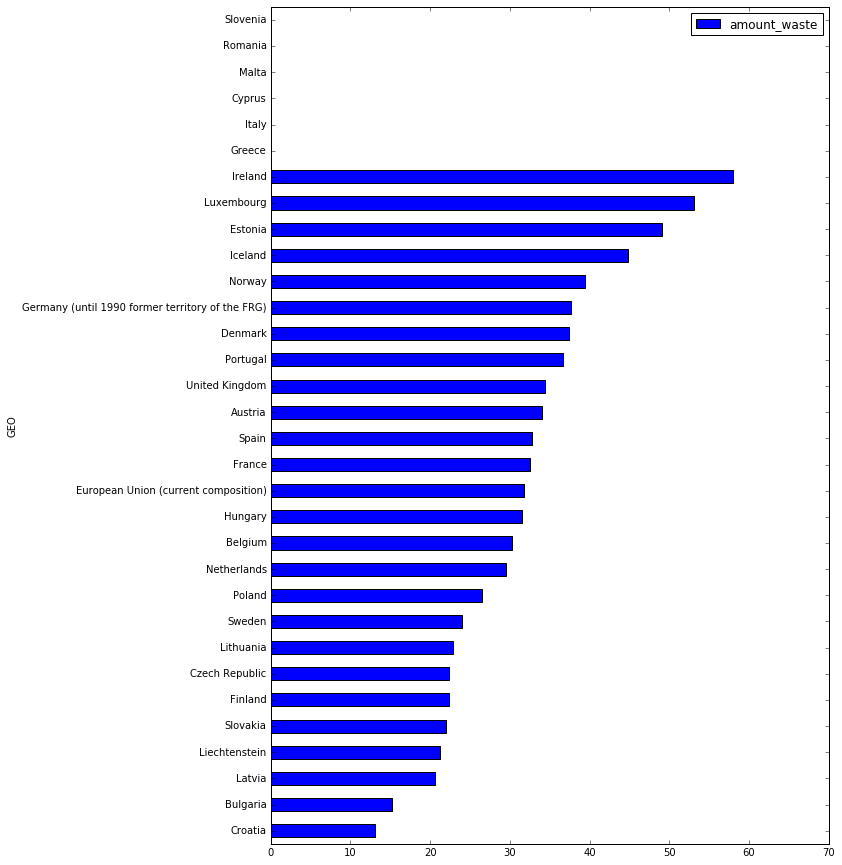

In [144]:
df_2016_domestic_generated_pc[df_2016_domestic_generated_pc['WASTE']=='Plastic packaging'].sort_values(by='amount_waste').plot(kind='barh', x='GEO', y='amount_waste', xlim=(0,70),figsize = (10,15))
plt.savefig('visuals/drafts/01_plastic_packaging_waste_kg_percapita.pdf', transparent = True)

In [145]:
df_2016_domestic_generated_pc[df_2016_domestic_generated_pc['WASTE']=='Plastic packaging'].sort_values(by='amount_waste', ascending = False)

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
398712,2016,Ireland,Plastic packaging,Domestic,Waste generated,Kilograms per capita,57.94,NaN,57.94
404544,2016,Luxembourg,Plastic packaging,Domestic,Waste generated,Kilograms per capita,53.09,NaN,53.09
398064,2016,Estonia,Plastic packaging,Domestic,Waste generated,Kilograms per capita,49.1,NaN,49.10
412968,2016,Iceland,Plastic packaging,Domestic,Waste generated,Kilograms per capita,44.8,NaN,44.80
414264,2016,Norway,Plastic packaging,Domestic,Waste generated,Kilograms per capita,39.38,NaN,39.38
397416,2016,Germany (until 1990 former territory of the FRG),Plastic packaging,Domestic,Waste generated,Kilograms per capita,37.62,NaN,37.62
396768,2016,Denmark,Plastic packaging,Domestic,Waste generated,Kilograms per capita,37.46,NaN,37.46
408432,2016,Portugal,Plastic packaging,Domestic,Waste generated,Kilograms per capita,36.66,NaN,36.66
412320,2016,United Kingdom,Plastic packaging,Domestic,Waste generated,Kilograms per capita,34.45,NaN,34.45
407136,2016,Austria,Plastic packaging,Domestic,Waste generated,Kilograms per capita,34.09,NaN,34.09


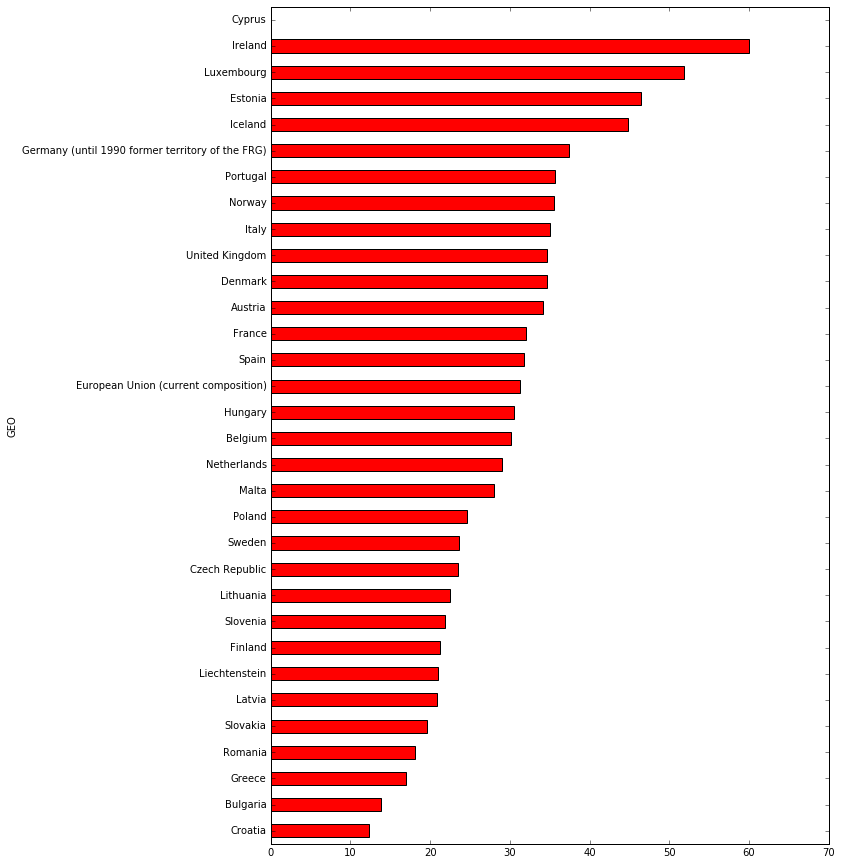

In [146]:
df_2015 = df[df['TIME']==2015]
df_2015[(df_2015['WASTE']=='Plastic packaging')&(df_2015['STK_FLOW']=='Domestic')&(df_2015['WST_OPER']=='Waste generated')&(df_2015['UNIT']=='Kilograms per capita')].sort_values(by='amount_waste', ascending = True).plot(kind='barh', figsize = (10,15), x="GEO", y='amount_waste',color='red', legend = False)
plt.savefig('visuals/drafts/01_plastic_packaging_waste_kg_percapita2015.pdf', transparent = True)

In [167]:
df_2015 = df[df['TIME']==2015]
df_2015[(df_2015['WASTE']=='Plastic packaging')&(df_2015['STK_FLOW']=='Domestic')&(df_2015['WST_OPER']=='Waste generated')&(df_2015['UNIT']=='Kilograms per capita')].sort_values(by='amount_waste', ascending = True)

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
380568,2015,Croatia,Plastic packaging,Domestic,Waste generated,Kilograms per capita,12.35,NaN,12.35
374736,2015,Bulgaria,Plastic packaging,Domestic,Waste generated,Kilograms per capita,13.87,NaN,13.87
378624,2015,Greece,Plastic packaging,Domestic,Waste generated,Kilograms per capita,16.99,NaN,16.99
388344,2015,Romania,Plastic packaging,Domestic,Waste generated,Kilograms per capita,18.12,NaN,18.12
389640,2015,Slovakia,Plastic packaging,Domestic,Waste generated,Kilograms per capita,19.62,NaN,19.62
382512,2015,Latvia,Plastic packaging,Domestic,Waste generated,Kilograms per capita,20.92,NaN,20.92
392880,2015,Liechtenstein,Plastic packaging,Domestic,Waste generated,Kilograms per capita,20.96,NaN,20.96
390288,2015,Finland,Plastic packaging,Domestic,Waste generated,Kilograms per capita,21.27,NaN,21.27
388992,2015,Slovenia,Plastic packaging,Domestic,Waste generated,Kilograms per capita,21.85,NaN,21.85
383160,2015,Lithuania,Plastic packaging,Domestic,Waste generated,Kilograms per capita,22.55,NaN,22.55


## Which country has the highest share of plastic packaging waste?

In [147]:
df_2016_domestic_generated_tonne = df_2016[(df_2016['STK_FLOW']=='Domestic')&(df_2016['WST_OPER']=='Waste generated')&(df['UNIT']=='Tonne')]

In [148]:
df_2016_domestic_generated_tonne.head()

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
394033,2016,European Union (current composition),Packaging,Domestic,Waste generated,Tonne,"86,327,540",s,86327540.0
394105,2016,European Union (current composition),Paper and cardboard packaging,Domestic,Waste generated,Tonne,"35,284,477",s,35284477.0
394177,2016,European Union (current composition),Plastic packaging,Domestic,Waste generated,Tonne,"16,218,454",s,16218454.0
394249,2016,European Union (current composition),Wooden packaging,Domestic,Waste generated,Tonne,"13,841,401",s,13841401.0
394321,2016,European Union (current composition),Metallic packaging,Domestic,Waste generated,Tonne,"4,551,283",s,4551283.0


In [149]:
waste_list =[]

for waste_type in df_2016_domestic_generated_tonne['WASTE']:
    waste_list.append(waste_type)
    
waste_types = set(waste_list)

In [150]:
waste_types

{'Aluminium packaging',
 'Glass packaging',
 'Metallic packaging',
 'Other packaging',
 'Packaging',
 'Paper and cardboard packaging',
 'Plastic packaging',
 'Steel packaging',
 'Wooden packaging'}

In [151]:
df_2016_domestic_generated_tonne_packaging = df_2016_domestic_generated_tonne[df_2016_domestic_generated_tonne['WASTE']=='Packaging']
df_2016_domestic_generated_tonne_packaging = df_2016_domestic_generated_tonne_packaging[['GEO','amount_waste']]
df_2016_domestic_generated_tonne_packaging.columns=(['GEO','packaging_waste_generated_2016_tonne'])
df_2016_domestic_generated_tonne_packaging.head()

,GEO,packaging_waste_generated_2016_tonne
394033,European Union (current composition),86327540.0
394681,Belgium,1780492.0
395329,Bulgaria,421145.0
395977,Czech Republic,1149843.0
396625,Denmark,935325.0


In [152]:
for waste_type in waste_types:
    if waste_type != "Packaging":
        df_temp = df_2016_domestic_generated_tonne[df_2016_domestic_generated_tonne['WASTE']==waste_type]
        df_temp = df_temp[['GEO','amount_waste']]
        column_name = waste_type +'waste_generated_2016_tonne'
        df_temp.columns = (['GEO', column_name])
        df_2016_domestic_generated_tonne_packaging = df_2016_domestic_generated_tonne_packaging.merge(df_temp, left_on = 'GEO', right_on = 'GEO')

In [153]:
df_2016_domestic_generated_tonne_packaging.head()

,GEO,packaging_waste_generated_2016_tonne,Aluminium packagingwaste_generated_2016_tonne,Other packagingwaste_generated_2016_tonne,Paper and cardboard packagingwaste_generated_2016_tonne,Glass packagingwaste_generated_2016_tonne,Steel packagingwaste_generated_2016_tonne,Metallic packagingwaste_generated_2016_tonne,Wooden packagingwaste_generated_2016_tonne,Plastic packagingwaste_generated_2016_tonne
0,European Union (current composition),86327540.0,NaN,NaN,35284477.0,16195632.0,NaN,4551283.0,13841401.0,16218454.0
1,Belgium,1780492.0,NaN,13734.0,699682.0,404939.0,NaN,118434.0,200542.0,343161.0
2,Bulgaria,421145.0,NaN,3958.0,148229.0,77421.0,NaN,31890.0,51400.0,108247.0
3,Czech Republic,1149843.0,13260.0,30704.0,466109.0,207367.0,51137.0,64396.0,144377.0,236891.0
4,Denmark,935325.0,NaN,7682.0,413603.0,172607.0,NaN,36016.0,90824.0,214593.0


In [154]:
df_2016_domestic_generated_tonne_packaging['not_plastic']=df_2016_domestic_generated_tonne_packaging['packaging_waste_generated_2016_tonne']-df_2016_domestic_generated_tonne_packaging['Plastic packagingwaste_generated_2016_tonne']
df_2016_domestic_generated_tonne_packaging['share_plastic']= df_2016_domestic_generated_tonne_packaging['Plastic packagingwaste_generated_2016_tonne']/df_2016_domestic_generated_tonne_packaging['packaging_waste_generated_2016_tonne'] *100
df_2016_domestic_generated_tonne_packaging['share_not_plastic']= df_2016_domestic_generated_tonne_packaging['not_plastic']/df_2016_domestic_generated_tonne_packaging['packaging_waste_generated_2016_tonne'] *100

In [155]:
df_2016_domestic_generated_tonne_packaging[['GEO','share_plastic', 'share_not_plastic']].sort_values(by='share_plastic', ascending = False)

,GEO,share_plastic,share_not_plastic
29,Iceland,30.709498,69.290502
6,Estonia,28.994152,71.005848
7,Ireland,27.792853,72.207147
17,Hungary,25.853474,74.146526
31,Norway,25.788259,74.211741
2,Bulgaria,25.703024,74.296976
16,Luxembourg,24.198689,75.801311
11,Croatia,23.860873,76.139127
25,Slovakia,23.058919,76.941081
4,Denmark,22.943148,77.056852


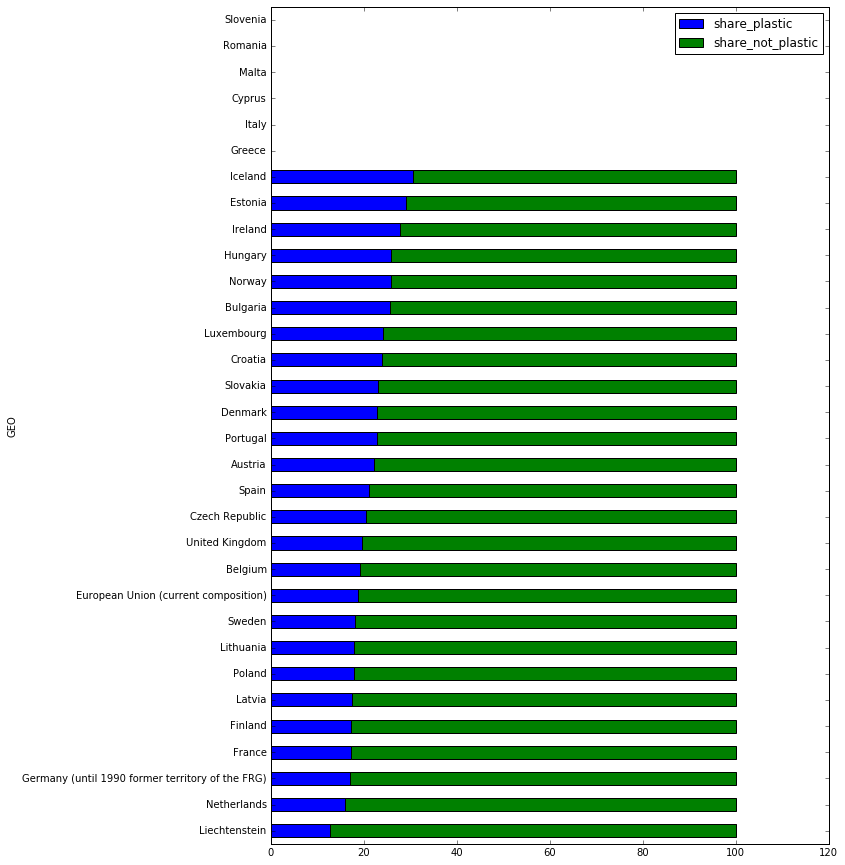

In [156]:
df_2016_domestic_generated_tonne_packaging[['GEO','share_plastic', 'share_not_plastic']].sort_values(by='share_plastic', ascending = True).plot(kind='barh',x='GEO', stacked =True, figsize=(10,15))

## What share of plastic packaging waste is recovered, what share is recycled?

In [157]:
df_2016_plastic_operations = df_2016[(df_2016['WASTE']=='Plastic packaging')&(df_2016['UNIT']=='Tonne')&(df_2016['STK_FLOW']=='Domestic')]
df_2016_plastic_operations = df_2016_plastic_operations[(df_2016_plastic_operations['WST_OPER']=='Waste generated')|(df_2016_plastic_operations['WST_OPER']=='Recovery')|(df_2016_plastic_operations['WST_OPER']=='Recycling')]
df_2016_plastic_operations

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
394177,2016,European Union (current composition),Plastic packaging,Domestic,Waste generated,Tonne,"16,218,454",s,16218454.0
394180,2016,European Union (current composition),Plastic packaging,Domestic,Recovery,Tonne,"11,988,618",s,11988618.0
394192,2016,European Union (current composition),Plastic packaging,Domestic,Recycling,Tonne,"6,900,176",s,6900176.0
394825,2016,Belgium,Plastic packaging,Domestic,Waste generated,Tonne,"343,161",NaN,343161.0
394828,2016,Belgium,Plastic packaging,Domestic,Recovery,Tonne,"341,401",NaN,341401.0
394840,2016,Belgium,Plastic packaging,Domestic,Recycling,Tonne,"149,034",NaN,149034.0
395473,2016,Bulgaria,Plastic packaging,Domestic,Waste generated,Tonne,"108,247",NaN,108247.0
395476,2016,Bulgaria,Plastic packaging,Domestic,Recovery,Tonne,"56,959",NaN,56959.0
395488,2016,Bulgaria,Plastic packaging,Domestic,Recycling,Tonne,"56,959",NaN,56959.0
396121,2016,Czech Republic,Plastic packaging,Domestic,Waste generated,Tonne,"236,891",NaN,236891.0


In [158]:
df_2016_plastic_operations_generated = df_2016_plastic_operations[df_2016_plastic_operations['WST_OPER']=='Waste generated']
df_2016_plastic_operations_generated = df_2016_plastic_operations_generated[['GEO', 'amount_waste']]
df_2016_plastic_operations_generated.columns = (['GEO', 'generated_plastic_waste_tonne_2016'])
df_2016_plastic_operations_generated.head()

,GEO,generated_plastic_waste_tonne_2016
394177,European Union (current composition),16218454.0
394825,Belgium,343161.0
395473,Bulgaria,108247.0
396121,Czech Republic,236891.0
396769,Denmark,214593.0


In [159]:
operations = []

for operation in df_2016_plastic_operations['WST_OPER']:
    operations.append(operation)
    
operation_types = set(operations)

In [160]:
for operation in operation_types:
    if operation !='Waste generated':
        df_temp = df_2016_plastic_operations[df_2016_plastic_operations['WST_OPER']==operation]
        df_temp = df_temp[['GEO','amount_waste']]
        column_name = 'waste'+operation
        df_temp.columns = (['GEO', column_name])
        df_2016_plastic_operations_generated = df_2016_plastic_operations_generated.merge(df_temp, left_on = 'GEO', right_on = 'GEO')

In [161]:
df_2016_plastic_operations_generated['share_recycled']=df_2016_plastic_operations_generated['wasteRecycling']/df_2016_plastic_operations_generated['generated_plastic_waste_tonne_2016']*100
df_2016_plastic_operations_generated['share_recovered_total'] = df_2016_plastic_operations_generated['wasteRecovery']/df_2016_plastic_operations_generated['generated_plastic_waste_tonne_2016']*100
df_2016_plastic_operations_generated['share_recovered_not_recycled']=(df_2016_plastic_operations_generated['wasteRecovery']-df_2016_plastic_operations_generated['wasteRecycling'])/df_2016_plastic_operations_generated['generated_plastic_waste_tonne_2016']*100
df_2016_plastic_operations_generated['share_not_recovered']= 100.0-df_2016_plastic_operations_generated['share_recovered_total']

In [162]:
df_2016_plastic_operations_generated_shares= df_2016_plastic_operations_generated[['GEO', 'share_recovered_total','share_recycled','share_recovered_not_recycled','share_not_recovered']]
df_2016_plastic_operations_generated_shares.sort_values(by='share_recovered_not_recycled', ascending = False)

,GEO,share_recovered_total,share_recycled,share_recovered_not_recycled,share_not_recovered
30,Liechtenstein,100.000000,20.921544,79.078456,0.000000
26,Finland,97.169696,25.408428,71.761268,2.830304
20,Austria,100.000000,33.577427,66.422573,0.000000
16,Luxembourg,95.071357,32.617067,62.454290,4.928643
4,Denmark,98.083348,36.104160,61.979189,1.916652
6,Estonia,85.848516,24.603334,61.245182,14.151484
1,Belgium,99.487121,43.429760,56.057361,0.512879
31,Norway,99.286865,44.602973,54.683892,0.713135
5,Germany (until 1990 former territory of the FRG),99.796204,49.724634,50.071569,0.203796
19,Netherlands,95.844930,51.491054,44.353877,4.155070


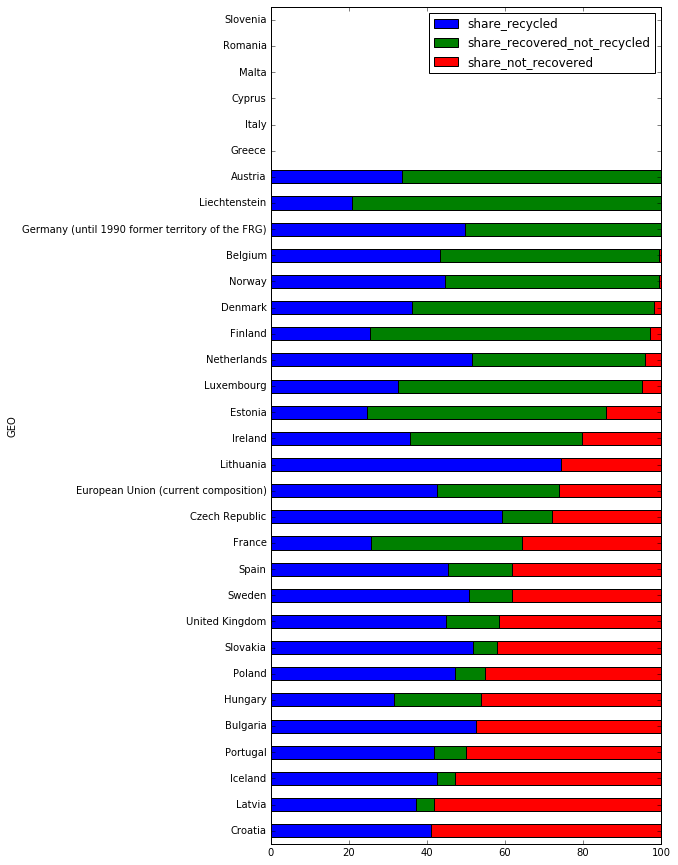

In [163]:
df_2016_plastic_operations_generated_shares.sort_values(by=['share_recovered_total','share_recycled'], ascending = [True,True]).plot(kind='barh', x='GEO', y=['share_recycled','share_recovered_not_recycled','share_not_recovered'], xlim=(0,100), stacked=True, figsize = (7,15))
# plt.savefig('visuals/drafts/02_plastic_packaging_waste_waste_operations.pdf', transparent = True)

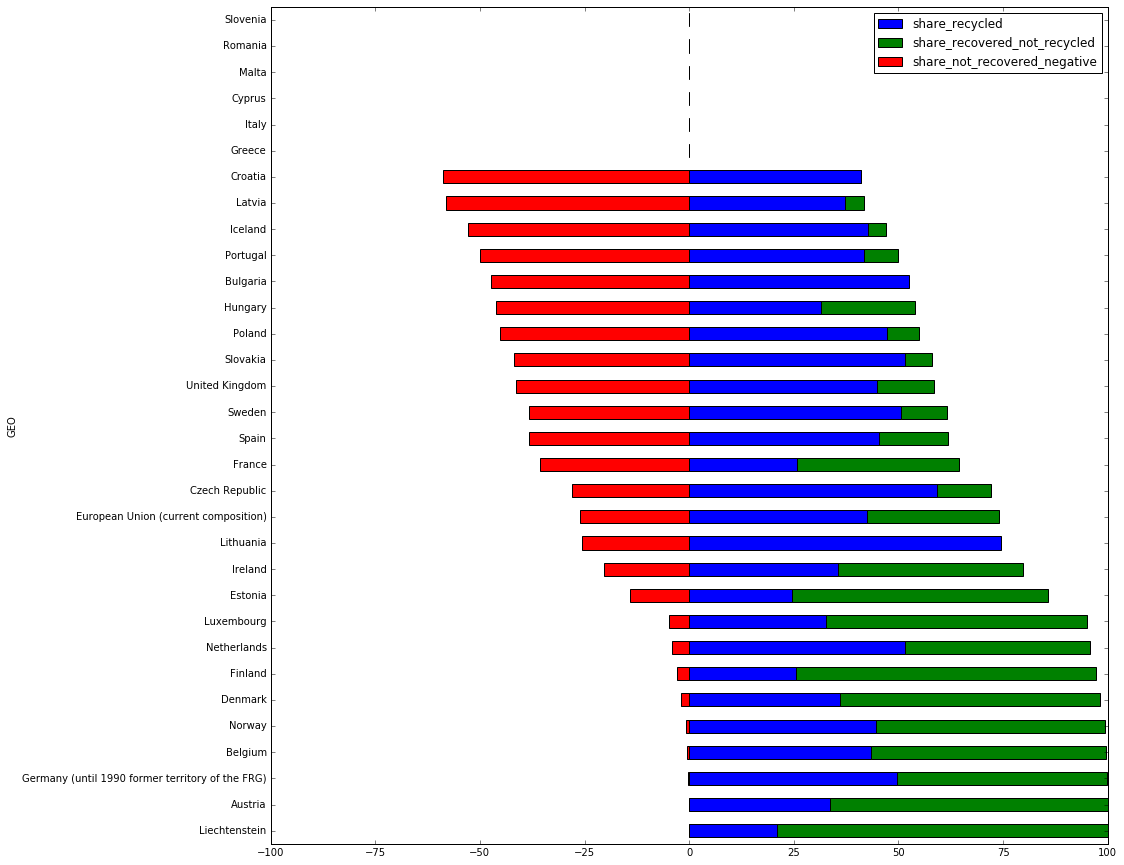

In [164]:
df_2016_manipulated = df_2016_plastic_operations_generated_shares.copy()
df_2016_manipulated['share_not_recovered_negative'] = [(value*-1 )for value in df_2016_manipulated['share_not_recovered']]

fig, ax = plt.subplots(figsize=(15,15))
df_2016_manipulated.sort_values(by='share_recovered_total', ascending = False).plot(ax=ax, kind='barh', x='GEO', y=['share_recycled','share_recovered_not_recycled','share_not_recovered_negative'], xlim=(0,100), stacked=True)

ax.set_xticks([-100,-75,-50,-25,0,25,50,75,100])
plt.savefig('visuals/drafts/02_plastic_packaging_waste_waste_operations-INVERTED.pdf', transparent = True)

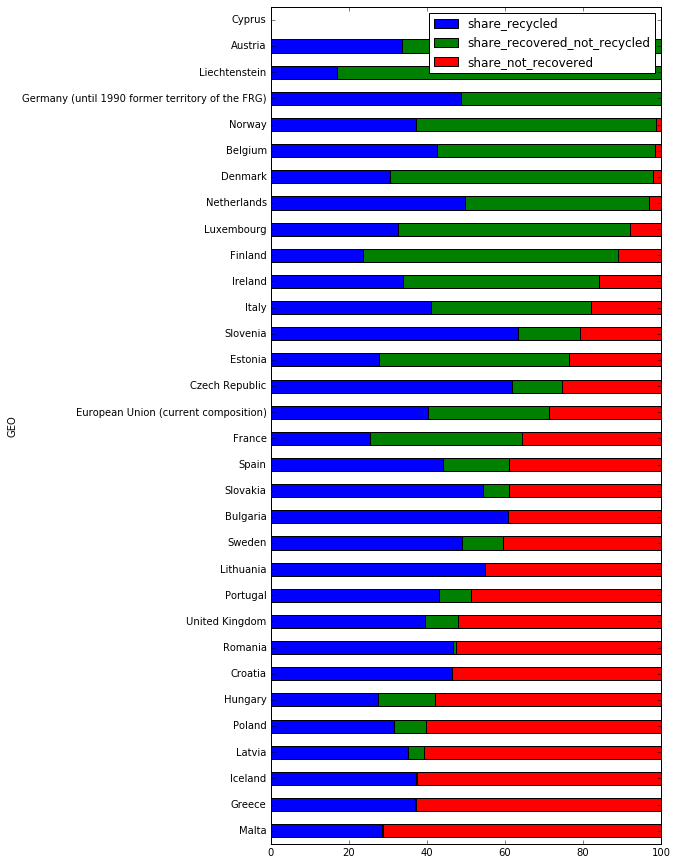

In [165]:
df_2015_plastic_operations = df_2015[(df_2015['WASTE']=='Plastic packaging')&(df_2015['UNIT']=='Tonne')&(df_2015['STK_FLOW']=='Domestic')]
df_2015_plastic_operations = df_2015_plastic_operations[(df_2015_plastic_operations['WST_OPER']=='Waste generated')|(df_2015_plastic_operations['WST_OPER']=='Recovery')|(df_2015_plastic_operations['WST_OPER']=='Recycling')]
df_2015_plastic_operations_generated = df_2015_plastic_operations[df_2015_plastic_operations['WST_OPER']=='Waste generated']
df_2015_plastic_operations_generated = df_2015_plastic_operations_generated[['GEO', 'amount_waste']]
df_2015_plastic_operations_generated.columns = (['GEO', 'generated_plastic_waste_tonne_2016'])
for operation in operation_types:
    if operation !='Waste generated':
        df_temp = df_2015_plastic_operations[df_2015_plastic_operations['WST_OPER']==operation]
        df_temp = df_temp[['GEO','amount_waste']]
        column_name = 'waste'+operation
        df_temp.columns = (['GEO', column_name])
        df_2015_plastic_operations_generated = df_2015_plastic_operations_generated.merge(df_temp, left_on = 'GEO', right_on = 'GEO')

df_2015_plastic_operations_generated['share_recycled']=df_2015_plastic_operations_generated['wasteRecycling']/df_2015_plastic_operations_generated['generated_plastic_waste_tonne_2016']*100
df_2015_plastic_operations_generated['share_recovered_total'] = df_2015_plastic_operations_generated['wasteRecovery']/df_2015_plastic_operations_generated['generated_plastic_waste_tonne_2016']*100
df_2015_plastic_operations_generated['share_recovered_not_recycled']=(df_2015_plastic_operations_generated['wasteRecovery']-df_2015_plastic_operations_generated['wasteRecycling'])/df_2015_plastic_operations_generated['generated_plastic_waste_tonne_2016']*100
df_2015_plastic_operations_generated['share_not_recovered']= 100.0-df_2015_plastic_operations_generated['share_recovered_total']
df_2015_plastic_operations_generated_shares= df_2015_plastic_operations_generated[['GEO', 'share_recovered_total','share_recycled','share_recovered_not_recycled','share_not_recovered']]
df_2015_plastic_operations_generated_shares.sort_values(by=['share_recovered_total','share_recycled'], ascending = [True,True]).plot(kind='barh', x='GEO', y=['share_recycled','share_recovered_not_recycled','share_not_recovered'], xlim=(0,100), stacked=True, figsize = (7,15))
# plt.savefig('visuals/drafts/02_plastic_packaging_waste_waste_operations-2015.pdf', transparent = True)

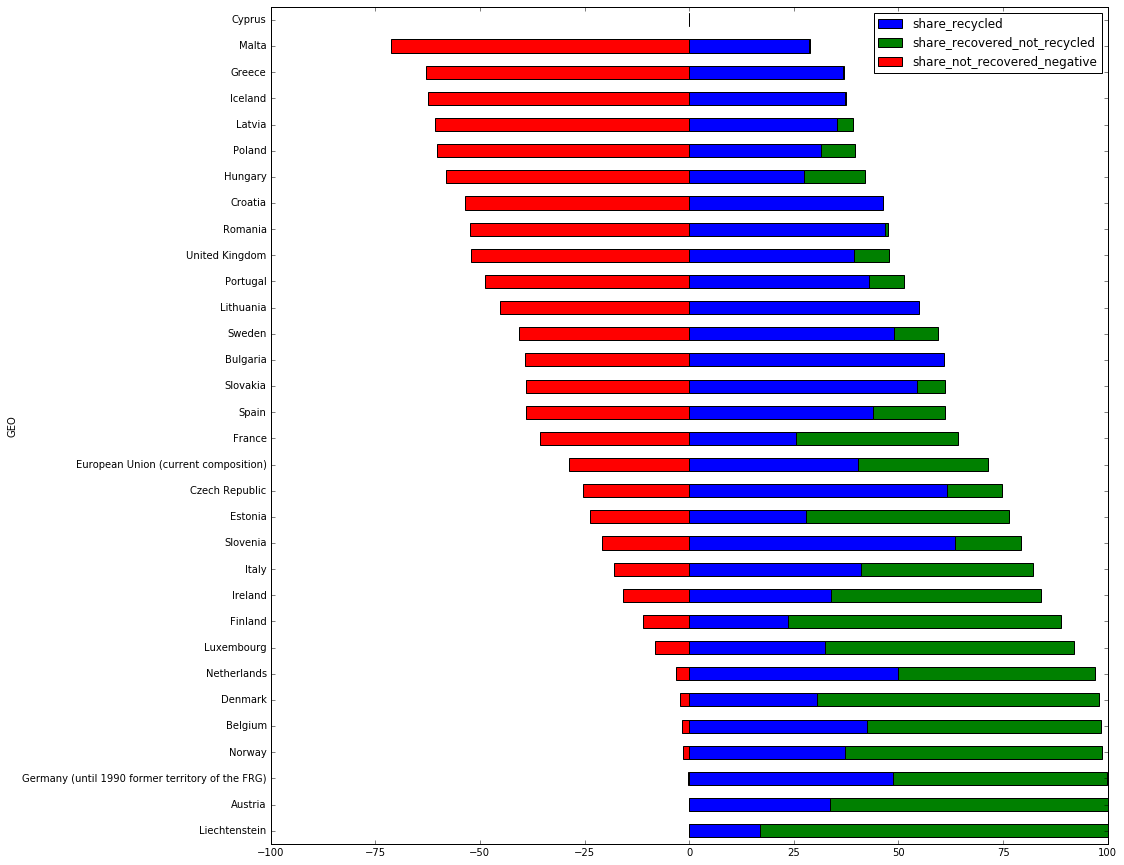

In [166]:
df_2015_manipulated = df_2015_plastic_operations_generated_shares.copy()
df_2015_manipulated['share_not_recovered_negative'] = [(value*-1 )for value in df_2015_manipulated['share_not_recovered']]

fig, ax = plt.subplots(figsize=(15,15))
df_2015_manipulated.sort_values(by='share_recovered_total', ascending = False).plot(ax=ax, kind='barh', x='GEO', y=['share_recycled','share_recovered_not_recycled','share_not_recovered_negative'], xlim=(0,100), stacked=True)

ax.set_xticks([-100,-75,-50,-25,0,25,50,75,100])
plt.savefig('visuals/drafts/02_plastic_packaging_waste_waste_operations-INVERTED-2015.pdf', transparent = True)

## How has the volume per capita of plastic packaging waste evolved for each country?

In [43]:
df.head()

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
0,1997,European Union (current composition),Packaging,Imports,Waste generated,Kilograms per capita,:,NaN,NaN
1,1997,European Union (current composition),Packaging,Imports,Waste generated,Tonne,:,NaN,NaN
2,1997,European Union (current composition),Packaging,Imports,Waste generated,Percentage,:,NaN,NaN
3,1997,European Union (current composition),Packaging,Imports,Recovery,Kilograms per capita,:,NaN,NaN
4,1997,European Union (current composition),Packaging,Imports,Recovery,Tonne,:,NaN,NaN


In [44]:
df_plastic_series = df[(df['STK_FLOW']=='Domestic')&(df['WASTE']=='Plastic packaging')&(df['UNIT']=='Kilograms per capita')&(df['WST_OPER']=='Waste generated')]
df_plastic_series.head()

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
192,1997,European Union (current composition),Plastic packaging,Domestic,Waste generated,Kilograms per capita,:,NaN,NaN
840,1997,Belgium,Plastic packaging,Domestic,Waste generated,Kilograms per capita,20.43,NaN,20.43
1488,1997,Bulgaria,Plastic packaging,Domestic,Waste generated,Kilograms per capita,:,NaN,NaN
2136,1997,Czech Republic,Plastic packaging,Domestic,Waste generated,Kilograms per capita,:,NaN,NaN
2784,1997,Denmark,Plastic packaging,Domestic,Waste generated,Kilograms per capita,34.71,NaN,34.71


In [46]:
countries_list = []

for country in df_plastic_series['GEO']:
    countries_list.append(country)
    
country_list = set(countries_list)

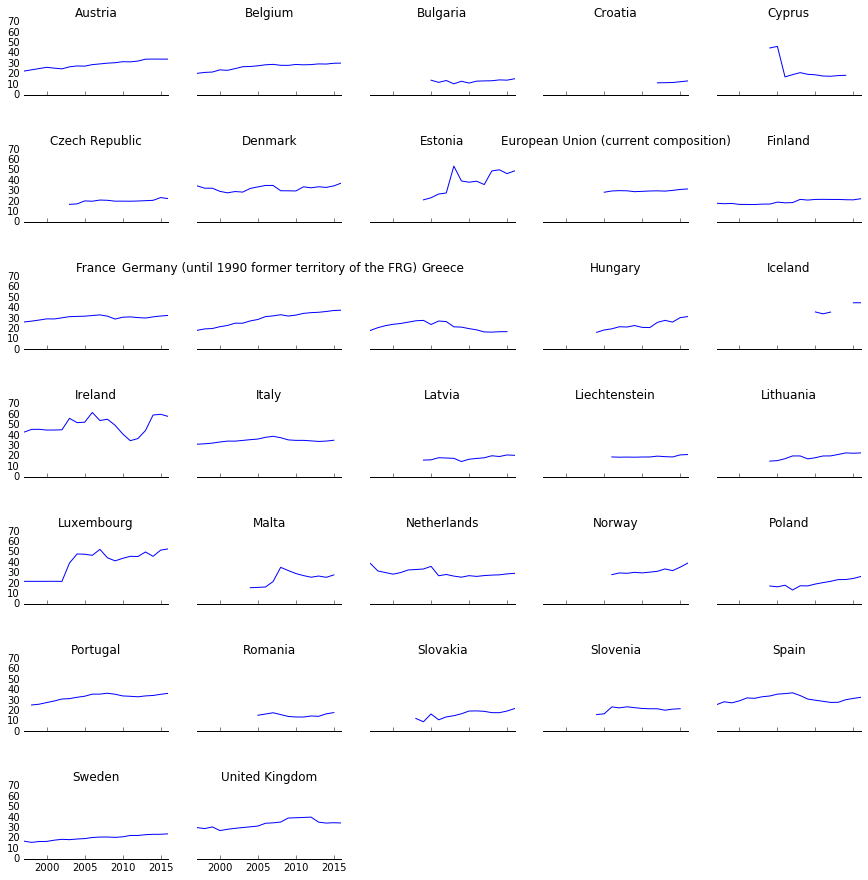

In [47]:
subsetdf = df_plastic_series.copy()
fig, axes = plt.subplots(nrows=7, ncols=5, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = subsetdf.groupby("GEO")

for countryname in sorted(country_list):
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='TIME', y='amount_waste', label = countryname, ax=ax, legend = False)
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
# plt.title('Plastic packaging waste in kilograms per capita generated in each country since 1997', x=0, y=12)
    
# plt.savefig('visuals/drafts/03_plastic_packaging_waste_kg_percapita_over_time.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

## Does the share of plastic packaging waste that is recycled increase over time?

In [48]:
df.head()

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
0,1997,European Union (current composition),Packaging,Imports,Waste generated,Kilograms per capita,:,NaN,NaN
1,1997,European Union (current composition),Packaging,Imports,Waste generated,Tonne,:,NaN,NaN
2,1997,European Union (current composition),Packaging,Imports,Waste generated,Percentage,:,NaN,NaN
3,1997,European Union (current composition),Packaging,Imports,Recovery,Kilograms per capita,:,NaN,NaN
4,1997,European Union (current composition),Packaging,Imports,Recovery,Tonne,:,NaN,NaN


In [49]:
df_recycling_series = df[(df['WASTE']=='Plastic packaging')&(df['STK_FLOW']=='Domestic')&(df['UNIT']=='Tonne')&((df['WST_OPER']=='Waste generated')|(df['WST_OPER']=='Recovery')|(df['WST_OPER']=='Recycling'))]
df_recycling_series.head()

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes,amount_waste
193,1997,European Union (current composition),Plastic packaging,Domestic,Waste generated,Tonne,:,NaN,NaN
196,1997,European Union (current composition),Plastic packaging,Domestic,Recovery,Tonne,:,NaN,NaN
208,1997,European Union (current composition),Plastic packaging,Domestic,Recycling,Tonne,:,NaN,NaN
841,1997,Belgium,Plastic packaging,Domestic,Waste generated,Tonne,"208,000",NaN,208000.0
844,1997,Belgium,Plastic packaging,Domestic,Recovery,Tonne,"52,711",NaN,52711.0


In [50]:
df_recycling_series['merge_key'] = df['TIME'].astype(str)+df['GEO']

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
df_recycling_series_generated = df_recycling_series[df_recycling_series['WST_OPER']=='Waste generated']
df_recycling_series_generated = df_recycling_series_generated[['TIME','GEO','merge_key','amount_waste']]
df_recycling_series_generated.columns = (['TIME','GEO', 'merge_key', 'generated_plastic_waste_tonne'])
df_recycling_series_generated.head()

,TIME,GEO,merge_key,generated_plastic_waste_tonne
193,1997,European Union (current composition),1997European Union (current composition),NaN
841,1997,Belgium,1997Belgium,208000.0
1489,1997,Bulgaria,1997Bulgaria,NaN
2137,1997,Czech Republic,1997Czech Republic,NaN
2785,1997,Denmark,1997Denmark,183430.0


In [52]:
for operation in operation_types:
    if operation !='Waste generated':
        df_temp = df_recycling_series[df_recycling_series['WST_OPER']==operation]
        df_temp = df_temp[['TIME','merge_key','GEO','amount_waste']]
        column_name = 'waste'+operation
        df_temp.columns = (['TIME','merge_key','GEO', column_name])
        df_recycling_series_generated = df_recycling_series_generated.merge(df_temp, left_on = 'merge_key', right_on = 'merge_key')

In [53]:
df_recycling_series_generated= df_recycling_series_generated[['TIME', 'GEO', 'generated_plastic_waste_tonne', 'wasteRecovery','wasteRecycling']]

In [54]:
df_recycling_series_generated

,TIME,GEO,generated_plastic_waste_tonne,wasteRecovery,wasteRecycling
0,1997,European Union (current composition),NaN,NaN,NaN
1,1997,Belgium,208000.0,52711.0,52711.0
2,1997,Bulgaria,NaN,NaN,NaN
3,1997,Czech Republic,NaN,NaN,NaN
4,1997,Denmark,183430.0,174821.0,11247.0
5,1997,Germany (until 1990 former territory of the FRG),1498800.0,916300.0,916300.0
6,1997,Estonia,NaN,NaN,NaN
7,1997,Ireland,157360.0,2669.0,2669.0
8,1997,Greece,193300.0,6000.0,6000.0
9,1997,Spain,1032000.0,189094.0,75500.0


In [55]:
df_recycling_series_generated['share_recycled']=df_recycling_series_generated['wasteRecycling']/df_recycling_series_generated['generated_plastic_waste_tonne']*100
df_recycling_series_generated['share_recovered_total'] = df_recycling_series_generated['wasteRecovery']/df_recycling_series_generated['generated_plastic_waste_tonne']*100
df_recycling_series_generated['share_recovered_not_recycled']=(df_recycling_series_generated['wasteRecovery']-df_recycling_series_generated['wasteRecycling'])/df_recycling_series_generated['generated_plastic_waste_tonne']*100
df_recycling_series_generated['share_not_recovered']= 100.0-df_recycling_series_generated['share_recovered_total']
df_recycling_series_generated

,TIME,GEO,generated_plastic_waste_tonne,wasteRecovery,wasteRecycling,share_recycled,share_recovered_total,share_recovered_not_recycled,share_not_recovered
0,1997,European Union (current composition),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,Belgium,208000.0,52711.0,52711.0,25.341827,25.341827,0.000000,74.658173
2,1997,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997,Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997,Denmark,183430.0,174821.0,11247.0,6.131494,95.306656,89.175162,4.693344
5,1997,Germany (until 1990 former territory of the FRG),1498800.0,916300.0,916300.0,61.135575,61.135575,0.000000,38.864425
6,1997,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1997,Ireland,157360.0,2669.0,2669.0,1.696111,1.696111,0.000000,98.303889
8,1997,Greece,193300.0,6000.0,6000.0,3.103983,3.103983,0.000000,96.896017
9,1997,Spain,1032000.0,189094.0,75500.0,7.315891,18.323062,11.007171,81.676938


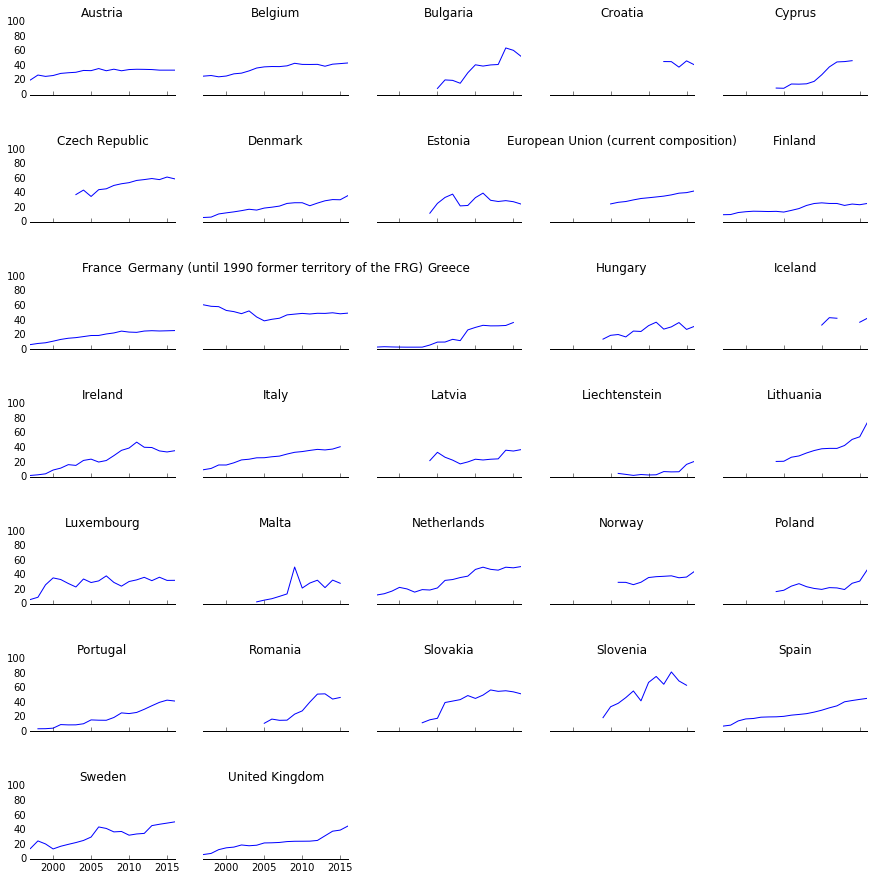

In [62]:
subsetdf = df_recycling_series_generated.copy()
fig, axes = plt.subplots(nrows=7, ncols=5, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = subsetdf.groupby("GEO")

for countryname in sorted(country_list):
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='TIME', y='share_recycled', label = countryname, ax=ax, legend = False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
# plt.title('Share of plastic packaging waste that was recycled', x=0, y=12)
    
# plt.savefig('visuals/drafts/04_plastic_packaging_waste_share_recycled.pdf', transparent = True)   
    
plt.subplots_adjust(hspace=0.75)

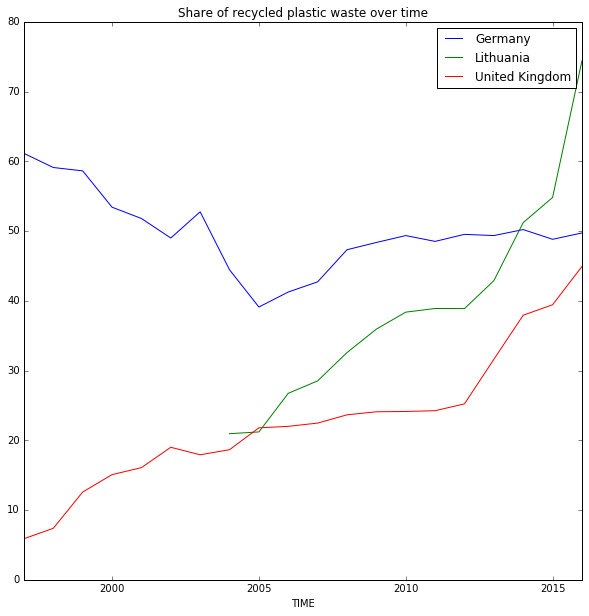

In [75]:
fig, ax = plt.subplots(figsize = (10,10))

df_recycling_series_generated[df_recycling_series_generated['GEO'] == 'Germany (until 1990 former territory of the FRG)'].plot(x='TIME', y='share_recycled', ax=ax, label='Germany')
df_recycling_series_generated[df_recycling_series_generated['GEO'] == 'Lithuania'].plot(kind = 'line', x='TIME', y='share_recycled', ax=ax, label='Lithuania')
df_recycling_series_generated[df_recycling_series_generated['GEO'] == 'United Kingdom'].plot(x='TIME', y='share_recycled', ax=ax, label='United Kingdom')
ax.set_title("Share of recycled plastic waste over time")

# plt.savefig('visuals/drafts/05_selection_recycled_plastic_waste.pdf', transparent = True)

## Does the share of plastic packaging waste that is otherwise recovered (eg. energy recovery) increase over time?

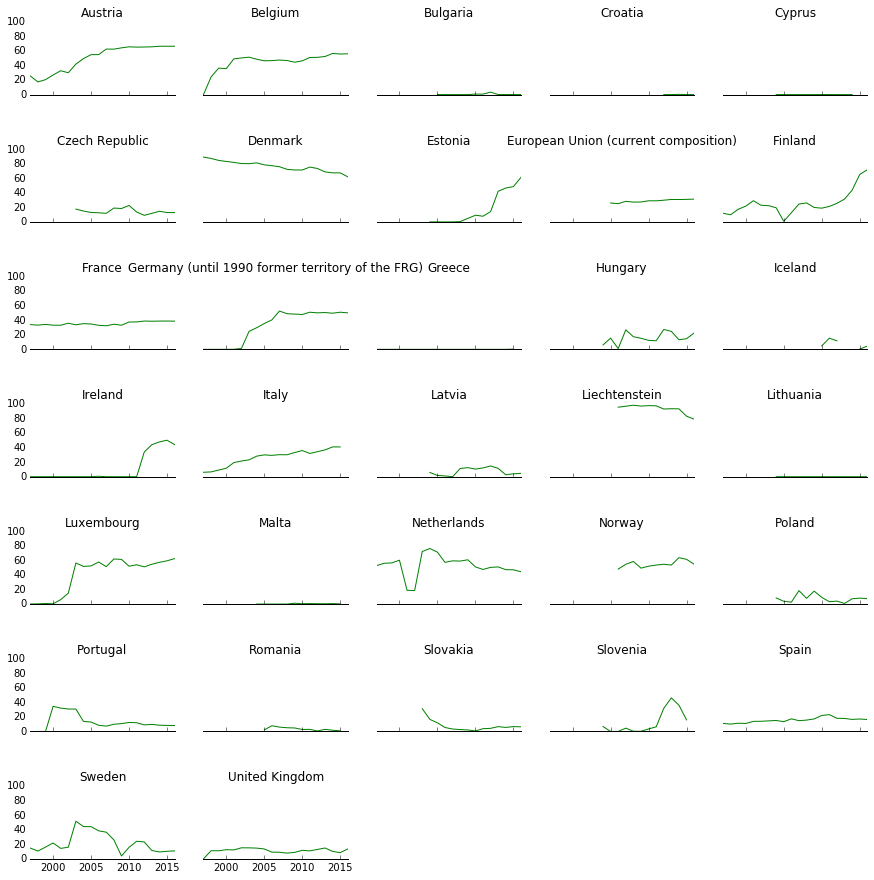

In [57]:
subsetdf = df_recycling_series_generated.copy()
fig, axes = plt.subplots(nrows=7, ncols=5, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = subsetdf.groupby("GEO")

for countryname in sorted(country_list):
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='TIME', y='share_recovered_not_recycled', label = countryname, ax=ax, color = "green", legend = False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
# plt.title('Share of plastic packaging waste that was recycled', x=0, y=12)
    
# plt.savefig('editorial-team-info/'+selected_continent+'-Visa-Applications-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

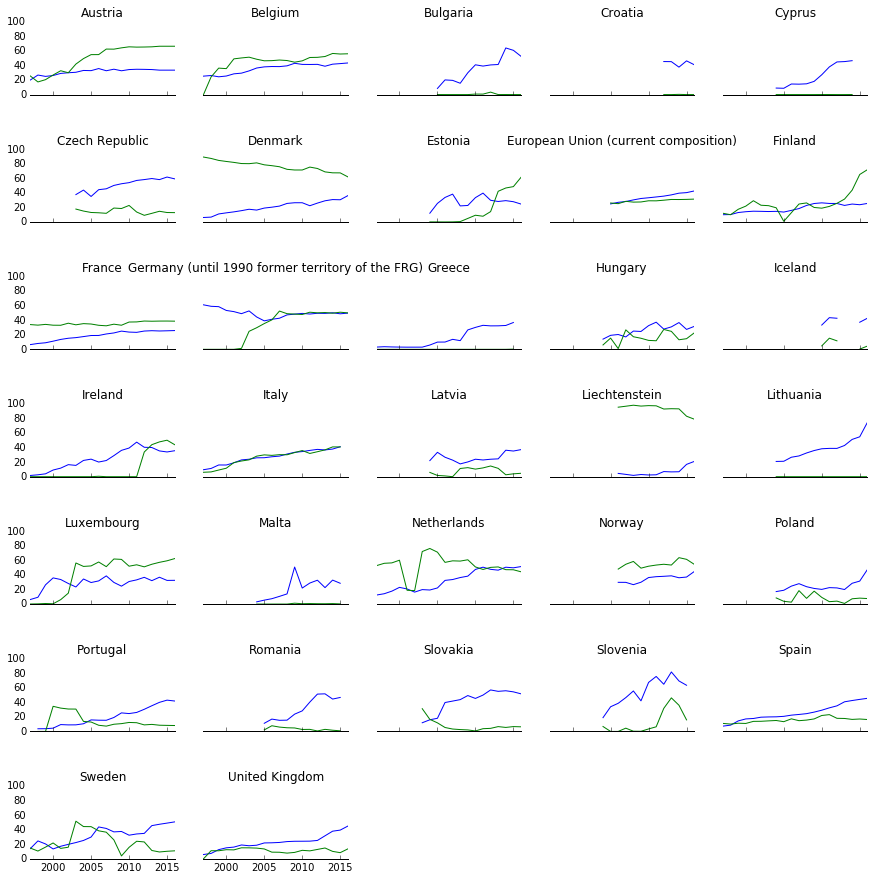

In [58]:
subsetdf = df_recycling_series_generated.copy()
fig, axes = plt.subplots(nrows=7, ncols=5, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = subsetdf.groupby("GEO")

for countryname in sorted(country_list):
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='TIME', y='share_recycled', label = countryname, ax=ax, color = "blue", legend = False)
    selection.plot(x='TIME', y='share_recovered_not_recycled', label = countryname, ax=ax, color = "green", legend = False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
# plt.title('Share of plastic packaging waste that was recycled', x=0, y=12)
    
# plt.savefig('editorial-team-info/'+selected_continent+'-Visa-Applications-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)

## How does the share of plastic packaging waste that is not recovered evolve over time?

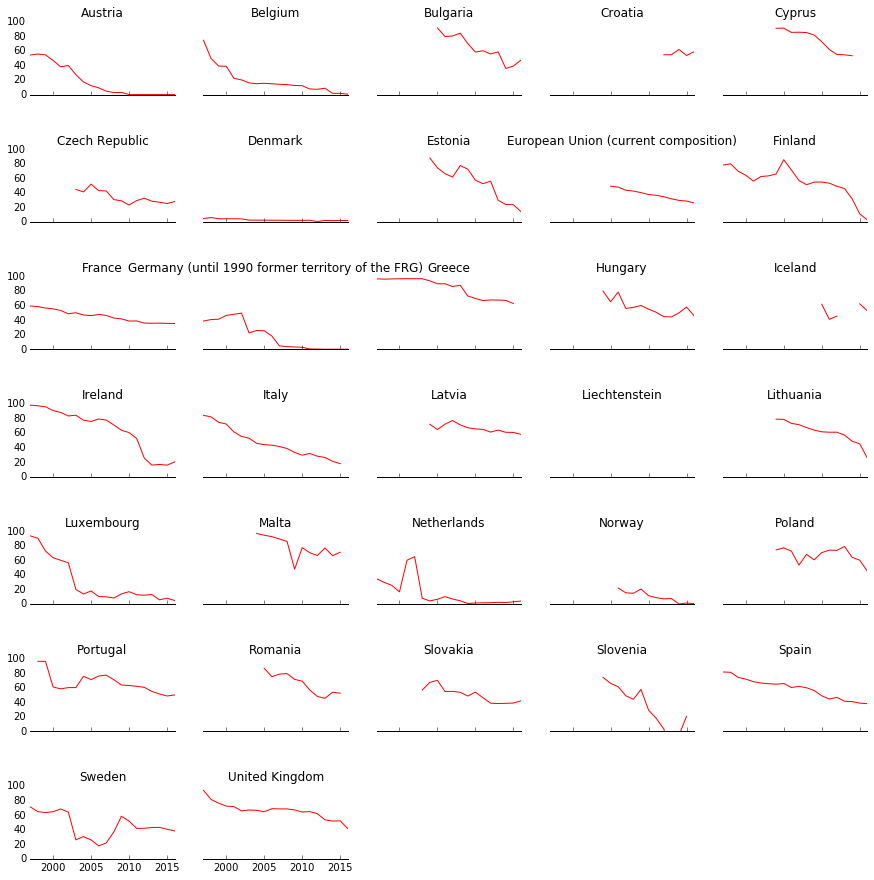

In [59]:
subsetdf = df_recycling_series_generated.copy()
fig, axes = plt.subplots(nrows=7, ncols=5, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

grouped = subsetdf.groupby("GEO")

for countryname in sorted(country_list):
    selection = grouped.get_group(countryname)
    
    ax = axes_list.pop(0)
    selection.plot(x='TIME', y='share_not_recovered', label = countryname, ax=ax, color = "red", legend = False)
    ax.set_title(countryname)
    ax.set_ylim(0,100)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")
    
for ax in axes_list:
    ax.remove()
    
# plt.title('Share of plastic packaging waste that was recycled', x=0, y=12)
    
# plt.savefig('editorial-team-info/'+selected_continent+'-Visa-Applications-TimeSeries.pdf', transparent = True)    
    
plt.subplots_adjust(hspace=0.75)